In [150]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('dados_produtos.csv', sep=',')


In [152]:
# # Criando um dicionario para substituir o nome de cada coluna
# dicionario = {
#     'product_name': 'Produto', 
#     'rating':'Classificação',
#     'rating_count': 'contagem de classificação',
#     'purchased':'Comprado',
# }
# df.rename(columns=dicionario,inplace=True) #renomeia as colunas
# df.head()

In [153]:
print("Informações do  Dataframe")
df.info()

Informações do  Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [154]:
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [156]:
produtos = df['product_name']
Classificaçao = df['rating']

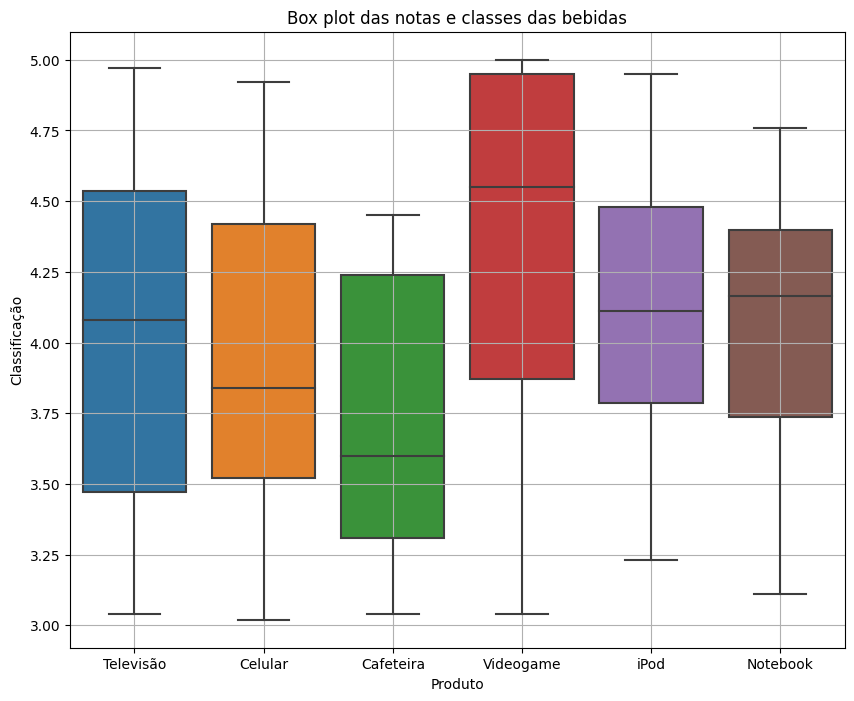

In [147]:
# plota box plot com a biblioteca seaborn 
# x é o eixo x que indica as classes : boa, ruim ou péssima
# y indica as notas
plt.figure(figsize=(10,8))


plt.title('Box plot das notas e classes das bebidas')

sns.boxplot(x = produtos, y = Classificaçao)
plt.grid()

In [160]:
# Criar o DataFrame (já feito anteriormente)

# 1. Verificar valores ausentes
print("Valores Ausentes em Cada Coluna:")
print(df.isnull().sum())

# 2. Lidar com valores ausentes
df.dropna(inplace=True)  # ou use df['rating'].fillna(df['rating'].mean(), inplace=True)

# 4. Normalizar colunas numéricas (opcional)
scaler = MinMaxScaler()
df[['rating', 'rating_count']] = scaler.fit_transform(df[['rating', 'rating_count']])

# 5. Dividir os dados em conjuntos de treinamento e teste (opcional)
X = df.drop('purchased', axis=1)  # Variáveis independentes
y = df['purchased']                # Variável dependente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Pré-processamento concluído!")

Valores Ausentes em Cada Coluna:
product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64
Pré-processamento concluído!



-------------------- Árvore de Decisão do Produto  Televisão --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6666666666666666
F1 Score: 0.75
Precision Score: 0.75
Recall Score: 0.75
Confusion Matrix: [[1 1]
 [1 3]]

Visualização da Árvore:


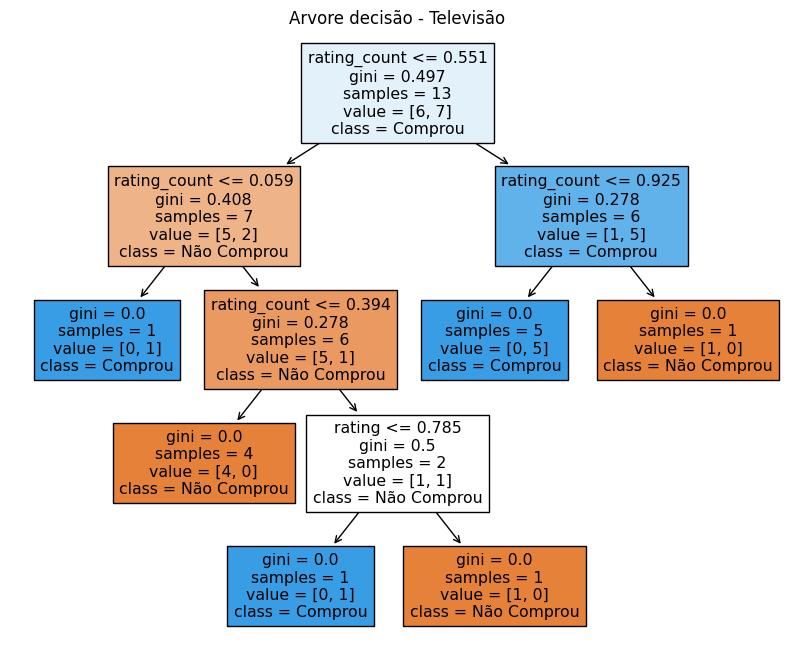


-------------------- Árvore de Decisão do Produto  Celular --------------------

Avaliação do Modelo: 

Accuracy Score: 0.42857142857142855
F1 Score: 0.5
Precision Score: 0.4
Recall Score: 0.6666666666666666
Confusion Matrix: [[1 3]
 [1 2]]

Visualização da Árvore:


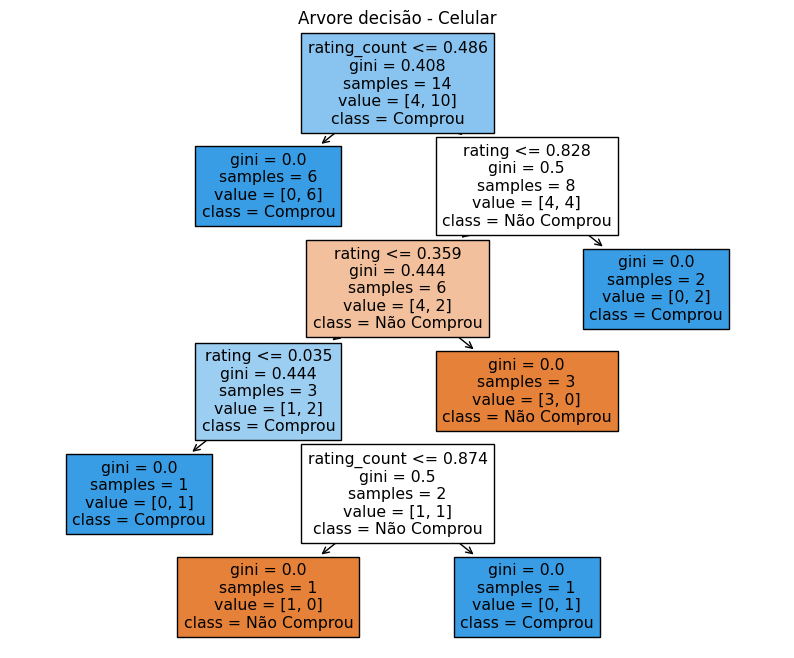


-------------------- Árvore de Decisão do Produto  Cafeteira --------------------

Avaliação do Modelo: 

Accuracy Score: 0.3333333333333333
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 1]
 [1 0]]

Visualização da Árvore:


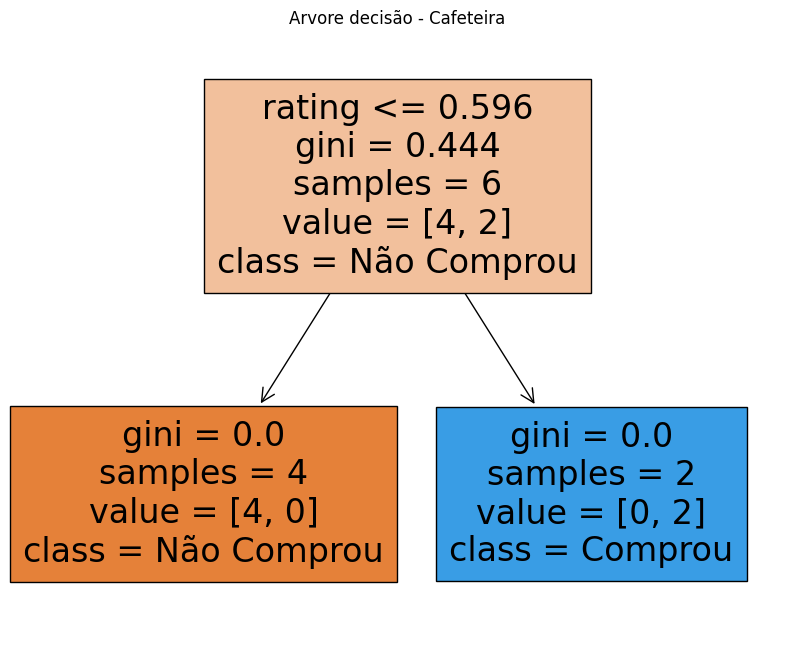


-------------------- Árvore de Decisão do Produto  Videogame --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6666666666666666
F1 Score: 0.8
Precision Score: 0.6666666666666666
Recall Score: 1.0
Confusion Matrix: [[0 2]
 [0 4]]

Visualização da Árvore:


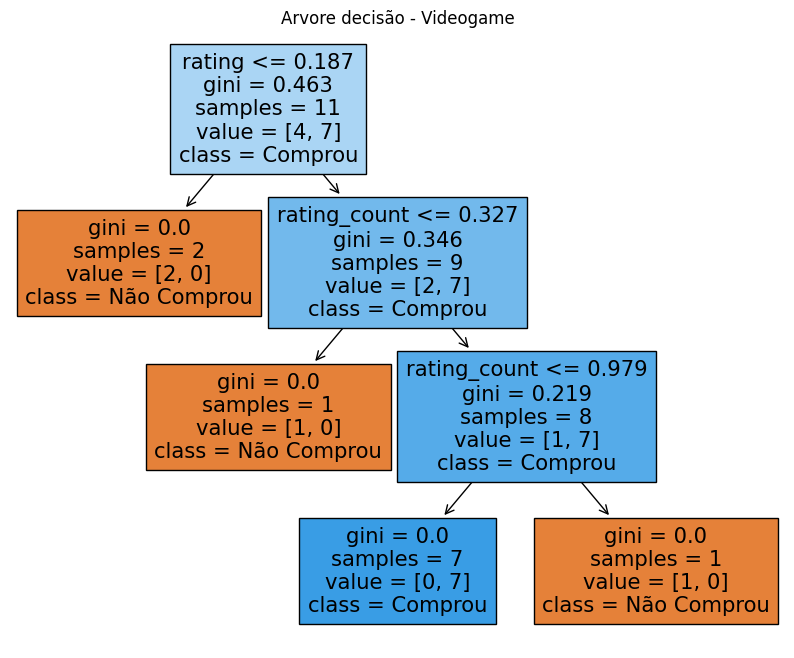


-------------------- Árvore de Decisão do Produto  iPod --------------------

Avaliação do Modelo: 

Accuracy Score: 0.16666666666666666
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 1]
 [4 0]]

Visualização da Árvore:


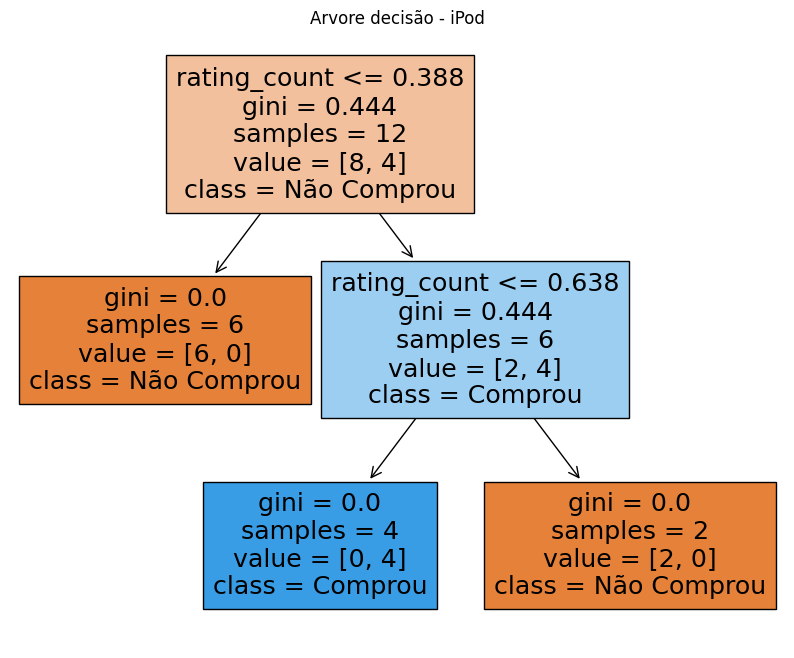


-------------------- Árvore de Decisão do Produto  Notebook --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.5
Precision Score: 0.3333333333333333
Recall Score: 1.0
Confusion Matrix: [[2 2]
 [0 1]]

Visualização da Árvore:


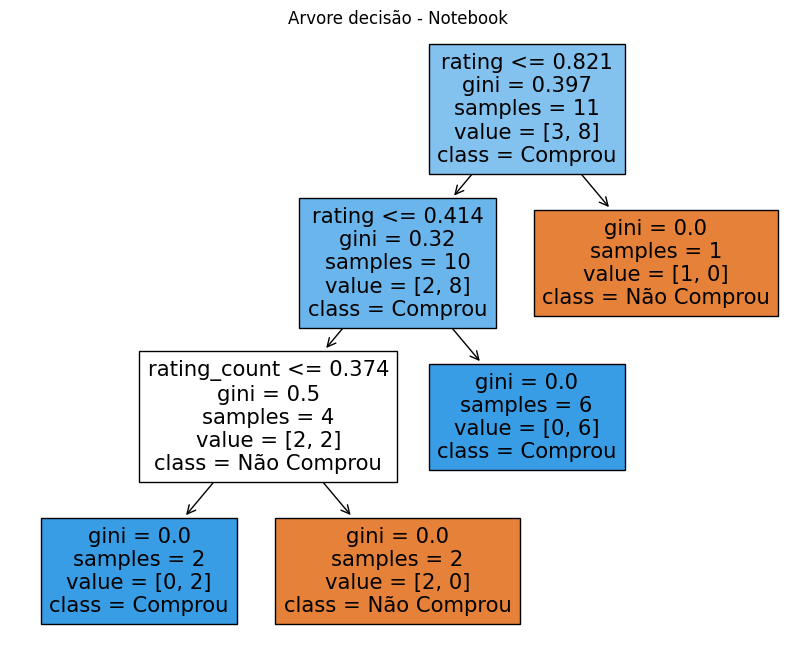

In [161]:
products = df['product_name'].unique()
 
for product in products:
    print(f'\n-------------------- Árvore de Decisão do Produto  {product} --------------------\n')
 
    product_df = df.loc[df['product_name'] == product]
 
    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']
 
    X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_teste)
 
    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
 
    print('\nVisualização da Árvore:')
   
    # Mapeando as classes
    product_df.loc[:, 'purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
 
    fig = plt.figure(figsize=(10, 8))
 
    # Usando os nomes corretos para features e classes
    plot_tree(model, feature_names=X.columns.tolist(), class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Arvore decisão - {product}')
    plt.show()

,Classificação,contagem de classificação,Comprado,Produto_Celular,Produto_Notebook,Produto_Televisão,Produto_Videogame,Produto_iPod
0,0.010101,0.003825,NaN,False,False,True,False,False
1,0.222222,0.777532,NaN,True,False,False,False,False
2,0.116162,0.236964,NaN,False,False,False,False,False
3,0.378788,0.822831,NaN,False,False,True,False,False
4,1.000000,0.951882,NaN,False,False,False,True,False
...,...,...,...,...,...,...,...,...
95,0.717172,0.274210,NaN,False,False,False,False,True
96,0.828283,0.338232,NaN,True,False,False,False,False
97,0.661616,0.675257,NaN,False,False,True,False,False
98,0.141414,0.365412,NaN,False,True,False,False,False
